<h1><center>EDA Heart Attack</center></h1>

<center><img src="https://simplonline.co/_next/image?url=https%3A%2F%2Fsimplonline-v3-prod.s3.eu-west-3.amazonaws.com%2Fmedia%2Fimage%2Fjpg%2F38999e38-5da0-41b6-81f6-60d68cb94c8b.jpg&w=1280&q=75" alt="3D heart" title="Heart"></center>

> __*Created by Charley Lebarbier*__

## Objectifs : 
__*Analyser le jeu de données sur les risques de crise cardiaque d'un échantillon de population, en prenant en compte les caractéristiques fournies du dataset :*__
-	__Age :__ Age of the patient
-	__Sex :__ Sex of the patient
-	__exng :__ exercise induced angina (yes; no)
-	__caa :__ number of major vessels (0-3)
-	__cp :__ Chest Pain type chest pain type
    -   __Value 1 :__ typical angina
    -	__Value 2 :__ atypical angina
    -	__Value 3 :__ non-anginal pain
    -	__Value 4 :__ asymptomatic
-	__trtbps :__ resting blood pressure (in mm Hg)
-	__chol :__ cholestoral in mg/dl fetched via BMI sensor
-	__fbs :__ (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
-	__restecg :__ resting electrocardiographic results
    -	__Value 0 :__ normal
    -	__Value 1 :__ having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    -	__Value 2 :__ showing probable or definite left ventricular hypertrophy by Estes' criteria
-	__thalachh :__ maximum heart rate achieved
-   __oldpeak :__ Previous peak
-   __slp :__ Slope
-   __thall :__ Thalium stress test result ~ (0,3)
-	__output :__ ‘less chance’ = less chance of heart attack ‘more chance’= more chance of heart attack


## Etapes :

1. Importer les bibliothèques adéquates.
2. Importer le jeu de données.
3. Voir s’il y a des valeurs manquantes
4. Supprimer une ligne contenant des valeurs manquantes (dropna)/transformer les valeurs manquantes (SimpleImputer).
5. Encoder les valeurs catégoriques (LabelEncoder).
6. Visualisation et analyse de données : Distribution, corrélations, outliers …
7. Fractionner le jeu de données pour l’entrainement et le test (voir sklearn.model_selection.train_test_split Training and Test set).
8. Mise à l’échelle des caractéristiques/features (StandardScaler, MinMaxScaler, RobustScaler).



_______________________________________________________________________________________________________________________________________

#### Préparation de notre environnement de travail

In [70]:
##### 1- Import des librairies utilisées pour le projet ##### 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import warnings

warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

%matplotlib inline

In [71]:
##### 2- Import de la dataset originale
dataset = pd.read_csv('dataset_HA_originale.csv')

dataset.head()  # On vérifie les premières lignes

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,M,3,145,233,1,0,150,no,2.3,0,0,1,more chance
1,37,M,2,130,250,0,1,187,no,3.5,0,0,2,more chance
2,41,F,1,130,204,0,0,172,no,1.4,2,0,2,more chance
3,56,M,1,120,236,0,1,178,no,0.8,2,0,2,more chance
4,57,F,0,120,354,0,1,163,yes,0.6,2,0,2,more chance


#### Vérification du jeu de données

In [72]:
# On commence à regarder si notre dataset est complet, autrement dit pas de valeur manquante : NaN

dataset.isnull().values.any()   # False si aucune des données manquantes (+ rapide que .sum())
# dataset.isnull().sum()        # si True, alors utiliser celle-ci pour déterminer le nbr manquant, et où.

False

La dataset ne comprend aucune donnée manquante, nous pouvons donc commencer à analyser le tout.

Dans le cas où notre dataset comprendrait plusieurs données manquantes, il nous faudra, avant de commencer l'analyse, fixer ce problème.  

2 possibilités s'offrent à nous :  
- La suppresion des lignes où nous n'avons pas toutes les données  
- Le remplacement des données en utilisant soit la moyenne, le médian, le mode ou la constante de notre colonne où la donnée manque  

Vous pouvez-ci dessous actionner la stratégie qui vous semblera la plus adaptée à votre dataset.

In [ ]:
# Première stratégie : effacement des lignes où les données sont manquantes

# dataset.dropna()


#######
# Deuxième stratégie : remplacement des données selon le mode qui permettra
# de traiter les caractéristiques catégorielles comme le Sexe ou l'output

# from sklearn.impute import SimpleImputer   # Import de la fonction

# imp_mode = SimpleImputer(missing_values=pd.NA, strategy='most_frequent')
# imp_mode.fit_transform(dataset)

__________________________________________________
__________________________________________________

<center><h2>EDA - Analyse Exploratoire de Données</h2></center>

Avant de démarrer notre exploration des données, nous pouvons d'ores et déjà appliquer une première analyse statistique, via la commande describe(), pour en resortir les grandes tendances de notre dataset.

In [73]:
dataset.describe()

,age,cp,trtbps,chol,fbs,restecg,thalachh,oldpeak,slp,caa,thall
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,1.039604,1.399340,0.729373,2.313531
std,9.082101,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,6.200000,2.000000,4.000000,3.000000


Rapidement, on peut noter que la moyenne d'âge est autour de 54 ans, la personne la plus jeune ayant 29 ans et la plus vieille 77 ans.  

On note également qu'il y a un plus grand nombre de personnes qui à un risque d'avoir une crise cardiaque: 54%.  
Le reste des éléments sont pour le moment assez obscur, nous nous attarderons pas dessus pour le moment.

A la suite de ces premières observations, on peut souhaiter en apprendre davantage sur la répartition de notre population. Pour cela on peut déjà regarder la distribution autour du sexe et de l'âge des individus.

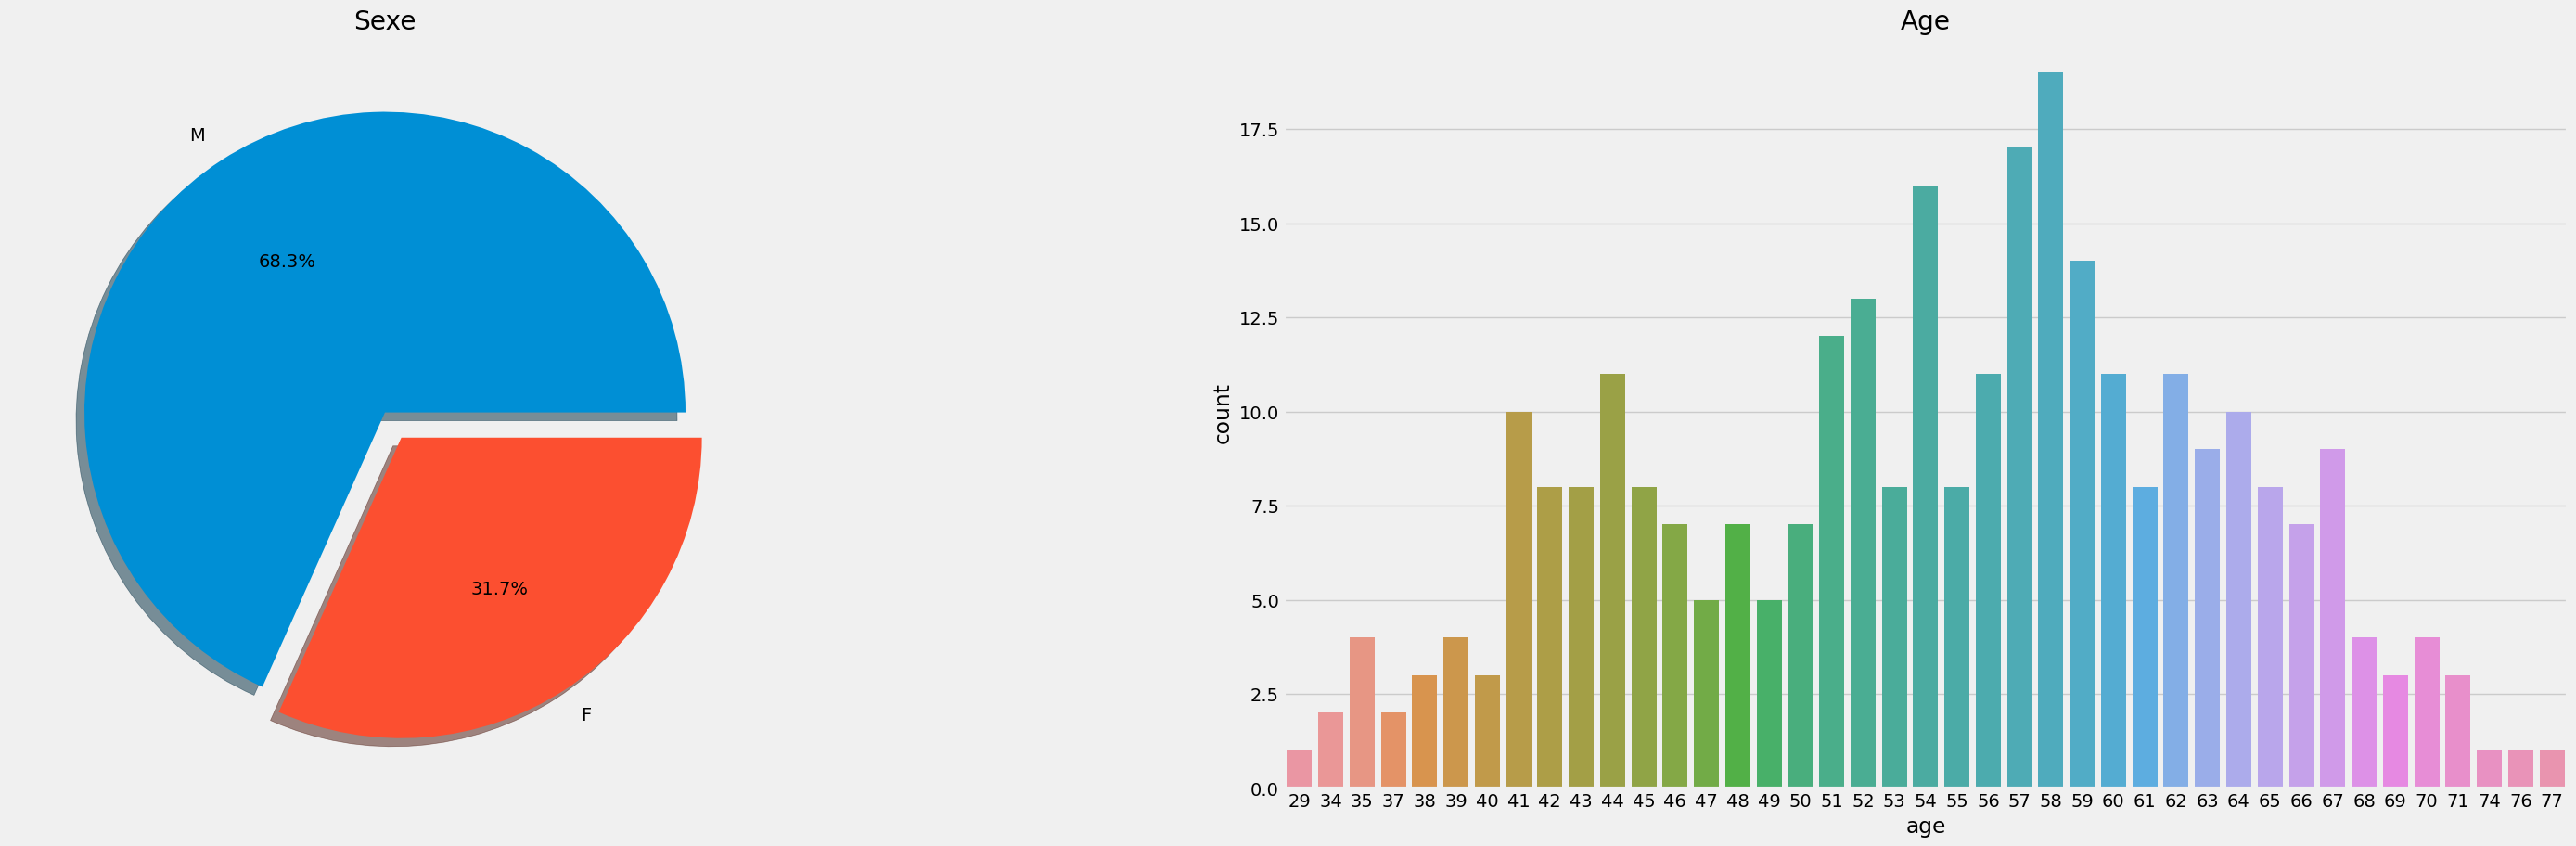

In [74]:
# création des graphs pour visualiser les données l'âge et le sexe des individus de notre dataset
f, ax = plt.subplots(1, 2, figsize = (35, 10))

ax[0].set_title('Sexe')
dataset['sex'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax=ax[0], shadow = True)
ax[0].set_ylabel('')

ax[1].set_title('Age')
sns.countplot(data=dataset, x='age', ax=ax[1])

plt.show()

In [75]:
dataset.groupby('sex')['sex'].count()   # Affiche le nombre exact d'hommes et de femmes dans notre dataset

sex
F     96
M    207
Name: sex, dtype: int64

__Conclusion :__

- On observe une surreprésentation d'hommes dans notre dataset (68,3%, soit 207 personnes) contre 31,7% de femmes (soit 96 personnes).

- Par ailleurs, la population de notre dataset a un âge compris entre 29 et 77 ans. Néanmoins, il est bon de remarquer que nous n'avons pas d'échantillon pour toutes les années.  
Par exemple, entre >29 ans et <34 ans, nous n'avons aucun individu ayant un âge correspondant à cette tranche, autrement dit ayant : 30, 31, 32 ou 33 ans.

Pour aller plus loin, nous pouvons regarder également la répartition des âges selon le sexe de notre population.

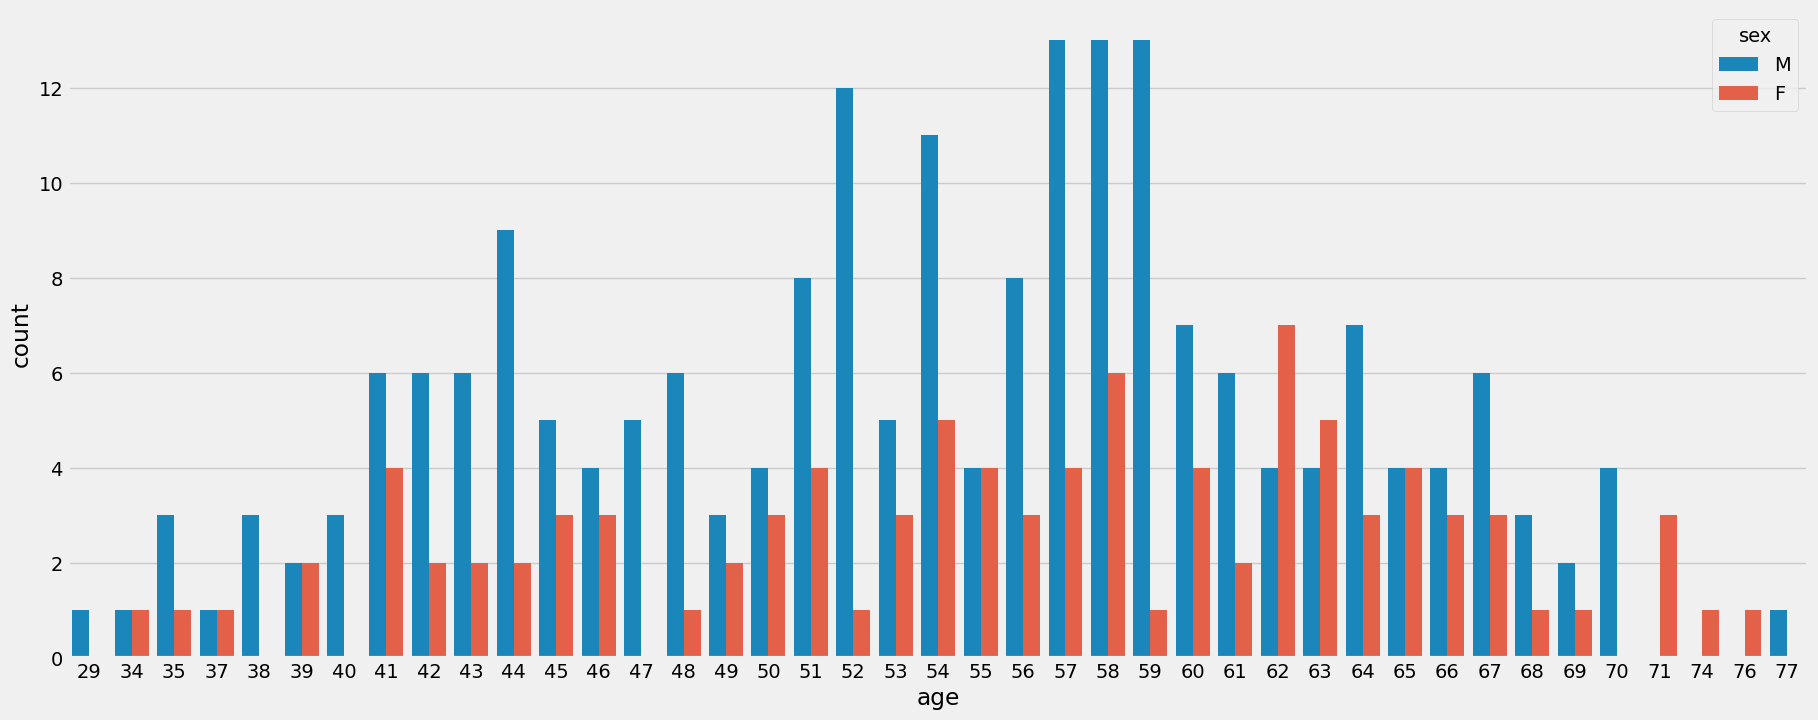

In [76]:
# Visualisation Age selon le Sexe 
sns.countplot(data=dataset, x='age', hue='sex')

fig = plt.gcf()
fig.set_size_inches(20,8)
plt.show()

__Conclusion :__ 

- La répartition Age/Sex n'est pas uniforme ; ainsi, nous avons que rarement le même nombre d'hommes et de femmes sur la même tranche d'âge (x5).  
    > 34, 37, 39, 55 et 65 ans  
- Dans le même rapport, certains âges n'est représenté que par une seule catégorie, soit M, soit F.  
    > Exemples : 29 ans(M), 38 ans(M), 71 ans(F), 74 ans(F), 77 ans(M).  
- Sur les autres âges, on aperçoit que nous avons majoritairement des données masculines ce qui pourrait fausser l'analyse pour la population féminine.  
    __*Préconisation possible*__ : nous pourrions envisager de diviser l'analyse selon le sexe de la personne.

Maintenant que nous avons une première idée sur la population de cet échantillon, nous pouvons commencer à rechercher des premiers éléments d'analyse.

L'une des premières réflexions que nous pouvons avoir est celle de vérifier l'hypothèse selon laquelle l'âge et le sexe de l'individu, impacte le risque de crise cardiaque.
Nous allons pour cela vérifier les risques selon l'âge et le sexe, afin de voir la répartition.

Pour cela, nous allons commencer par encoder la rubrique 'output' qui est catégorielle *(1 = 'more chance', 0 = 'less chance')*.

In [77]:
# Encodage de la colonne 'output' en valeur numérique de type 0 = 'less', 1 = 'more'
le = preprocessing.LabelEncoder()   # variable qui a la fonction d'un "as" pour faciliter le code
dataset.output = le.fit_transform(dataset.output)

dataset.head()   # Check si la transformation est faite

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,M,3,145,233,1,0,150,no,2.3,0,0,1,1
1,37,M,2,130,250,0,1,187,no,3.5,0,0,2,1
2,41,F,1,130,204,0,0,172,no,1.4,2,0,2,1
3,56,M,1,120,236,0,1,178,no,0.8,2,0,2,1
4,57,F,0,120,354,0,1,163,yes,0.6,2,0,2,1


Nous pouvons à présent travailler sur la colonne 'output'.

On peut tout de suite regarder comment est répartie les risques de crises cardiaques sur le sexe de notre population ainsi que leur âge.

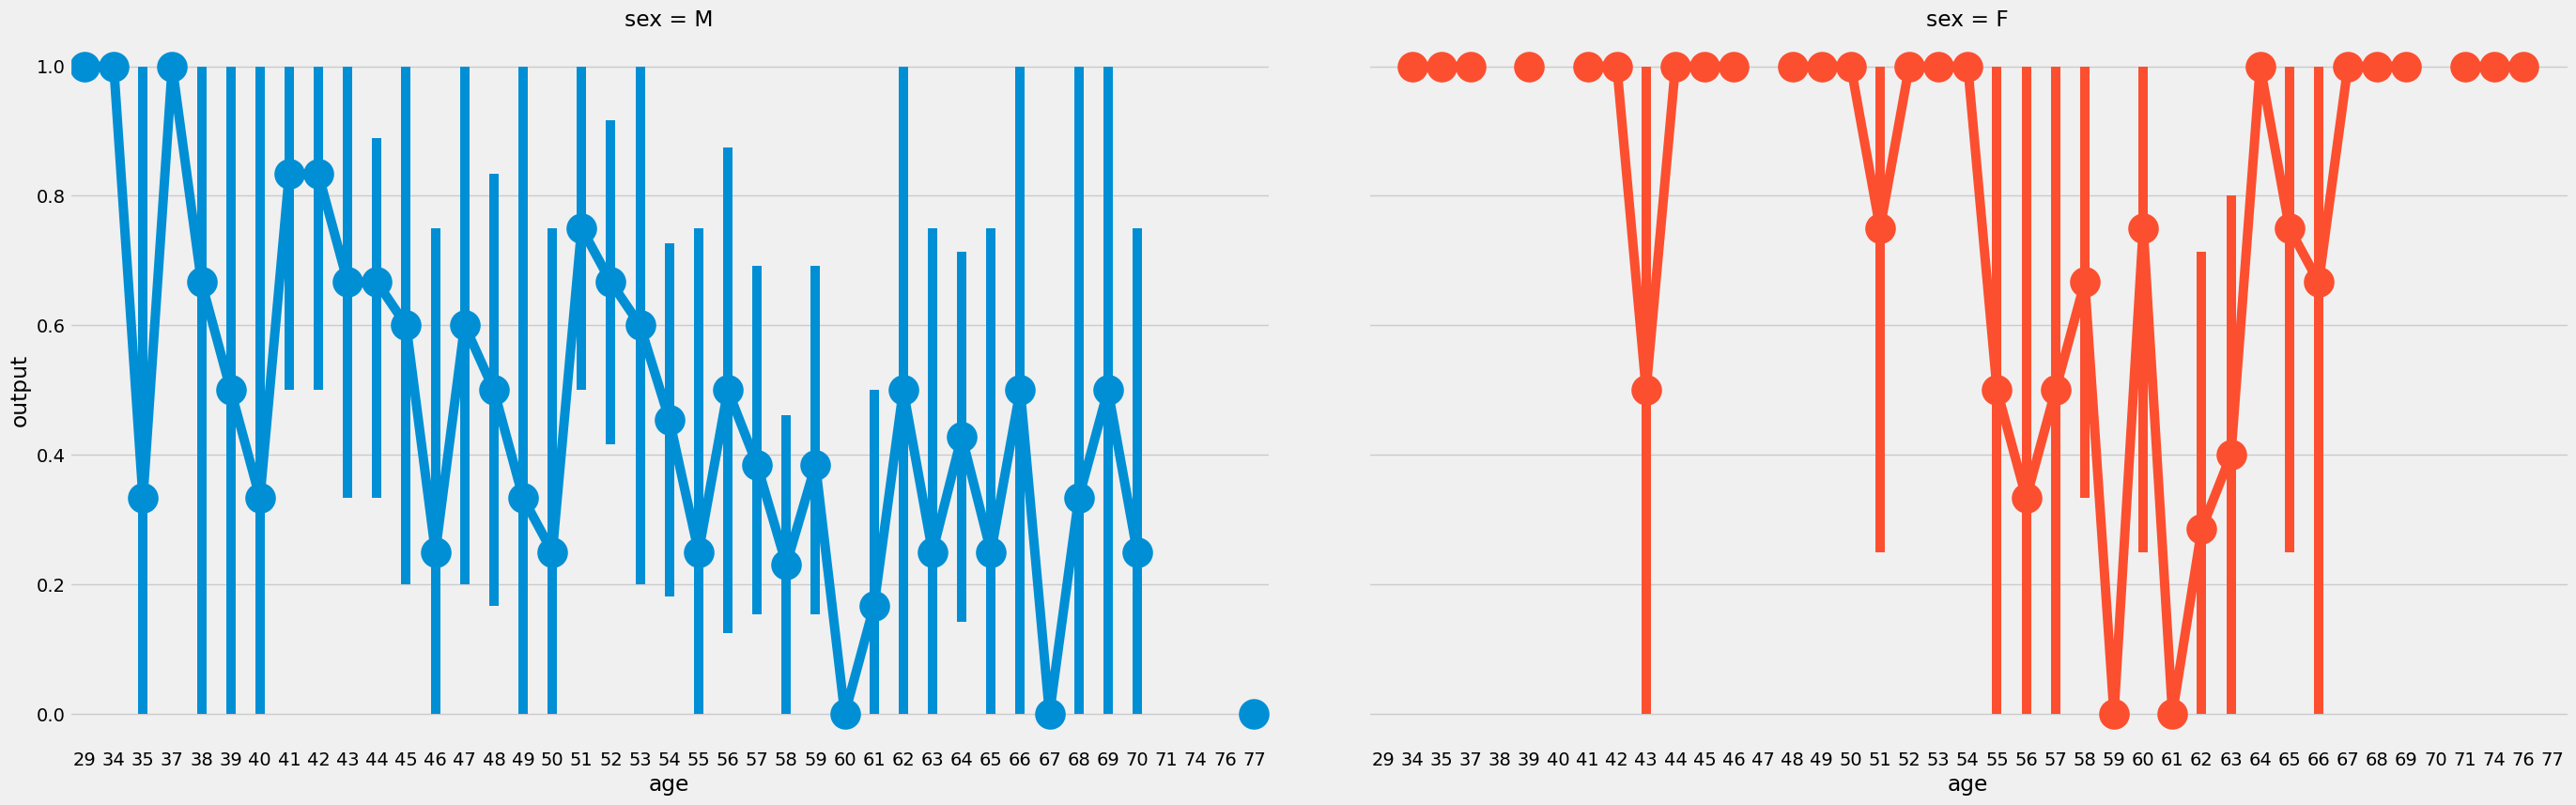

In [78]:
sns.catplot(data=dataset, x='age', y='output', col='sex', hue='sex', kind='point')

fig = plt.gcf()
fig.set_size_inches(30,10)
plt.show()

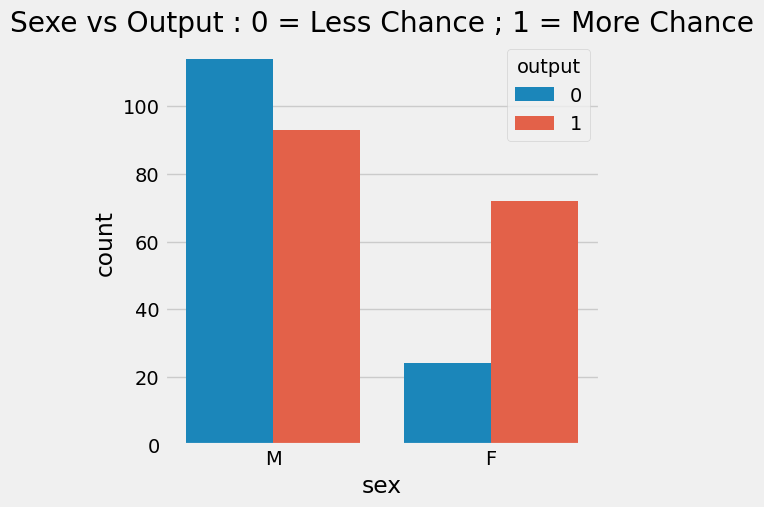

In [79]:
sns.countplot(data=dataset, x='sex', hue='output');
plt.title('Sexe vs Output : 0 = Less Chance ; 1 = More Chance')
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.show()

__Conclusion :__  

- __Homme :__
</br>
    - Les risques sont très diffus en fonction des âges, ce qui amène une réflexion selon laquelle d'autres facteur rentre en compte.  
    Un exemple pour illustrer : 50 ans ≃ 24% ; tandis que 51 ans ≃ 78%.  
    - On aperçoit déjà des données isolées qui ne sont pas forcément représentative de la population.  
    Exemple : 29 ans = 100% de risque alors que 77 ans  = 0% de risque.  
 </br>
 
- __Femme :__  
</br>
Contrairement aux hommes, deux choses sont remarquables.  
    - Dans le premier graphique, nous avons une plage, entre 55 et 66 ans, plus représentative des risques pour une femme.    
    Ceci s'explique en rapprochant ce graph à celui qui compare *'Age et Sexe'*. En effet, nous avons entre 4 et 7 femmes par an sur cette plage.
    - Le manque de données sur les autres années, provoque des données aberrantes.  
        - Soit, on a qu'une entrée ('more (1)' ou 'less (0)').  
        - Soit, les deux ou trois entrées possèdent la même valeur d'entrée, ne permettant donc pas d'avoir une analyse basée sur ce seul critère.
</br>

-  __Général :__
    Selon le second graphique :  
    - Les hommes ont plus de chance d'avoir une crise cardiaque, cependant l'écart avec les femmes est minime, puisqu'il est d'environ 15 points au-dessus.  
    - On peut remarquer pourtant que nous avons plus de données d'hommes ayant moins de chance d'avoir une crise cardiaque que d'en avoir une, avec un écart de 25 points, là où pour les femmes l'écart entre 'more' et 'less' est d'environ 45 points. Ces dernières ont contrairement aux hommes, toutes proportions gardées, plus de chance d'avoir une crise cardiaque. 
</br>
</br>

Cette première hypothèse n'est pas concluante. On ne peut pas admettre que l'âge ou le sexe serait le seul facteur justifiant les risques de crise cardiaque.  
</br>
Avant d'aller plus loin, on va finir d'encoder le reste des colonnes catégorielles, cad : 'sex' et 'exng', pour pouvoir faire nos corrélations entre caractéristiques.

In [80]:
# Encodage de la colonne 'sex' => 0 = 'F', 1 = 'M'
dataset.sex = le.fit_transform(dataset.sex)

# Encodage de la colonne 'exng' => 0 = 'yes', 1 = 'no'
dataset.exng = le.fit_transform(dataset.exng)

dataset.head()   # Check si la transformation est faite

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Maintenant que les transformations sont faites, nous pouvons commencer à regarder si des corrélations existent dans notre dataset.  
Pour cela, nous pouvons dans un premier temps afficher une heatmap afin de résumer l'ensemble.

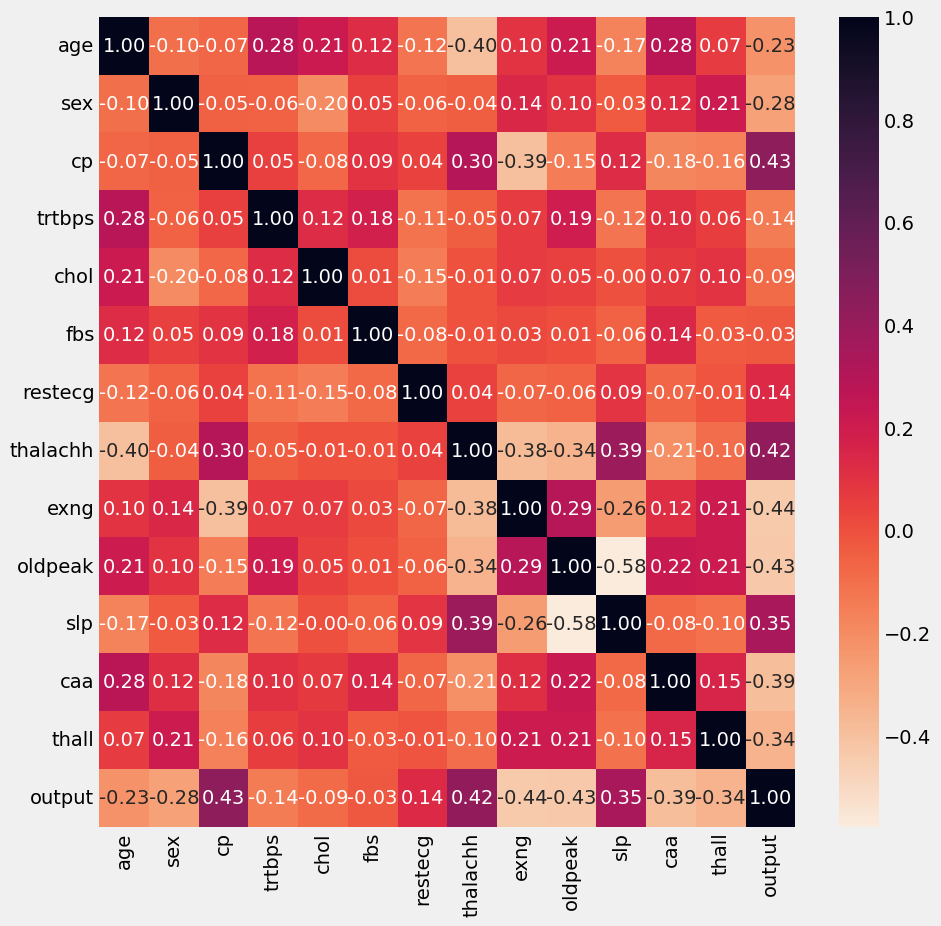

In [81]:
sns.heatmap(dataset.corr(), annot=True, cmap="rocket_r", fmt='.2f');

fig= plt.gcf()
fig.set_size_inches(10,10)
plt.show()

Visuellement on s'aperçoit que certaines colonnes match bien entre elle avec des corrélations positives et même des corrélations négatives.

Toutefois, on va commencer par se concentrer sur les corrélations qui peut exister avec notre colonne 'output'.  
En effet, c'est cette dernière qui nous indique si la personne a plus ou moins de "chance" d'avoir une crise cardiaque.  

In [82]:
# Détermine les corrélations qui existent avec 'output'
ds_nbr = dataset.select_dtypes(include = ['float64', 'int64'])

ds_nbr_corr = ds_nbr.corr()['output'][:-1]  # -la dernière colonne qui est 'output'
list__golden_features = ds_nbr_corr[abs(ds_nbr_corr) >= 0.3].sort_values(ascending=False)

print(f"Il y a {len(list__golden_features)} corrélation(s) forte(s) "
    + f"values avec 'output':\n\n{list__golden_features}")

Il y a 7 corrélation(s) forte(s) values avec 'output':

cp          0.433798
thalachh    0.421741
slp         0.345877
thall      -0.344029
caa        -0.391724
oldpeak    -0.430696
exng       -0.436757
Name: output, dtype: float64


Nous pouvons voir qu'il y a donc 7 corrélations intéragissant avec 'output' est étant supérieur à 0.3, ou inférieur à -0.3.  

Cela signifie que *'cp'*, *'thalachh'*, *'slp'* on une corrélation positive, autrement dit lorsqu'ils augmentent le risque de crise cardiaque augmente ; *a contrario* pour les colonnes *'thall'*, *'caa'*, *'oldpeak'* et *'exng'* lorsque celles-ci augmentent, le risque, lui, diminue.

Dorénavant, nous pouvons visualiser ces données pour aller plus loin dans l'analyse et comprendre à quel moment la bascule se fait.

__ANALYSE DU CP (Chest Pain) :__

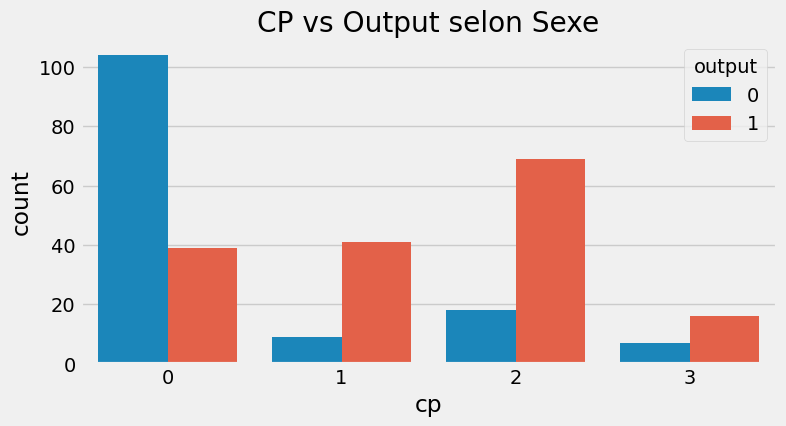

In [83]:
sns.countplot(data=dataset, x='cp', hue='output');
plt.title('CP vs Output selon Sexe')

fig= plt.gcf()
fig.set_size_inches(8,4)
plt.show()

__Conclusion :__

La caractéristique *'CP'* comprend 4 catégories : 0 = typical angina ; 1 = atypical angina ; 2 = non-anginal pain ; 3 = asymptomatic.

Sur le présent graphique, il est assez clair que les personnes atteintes d'une angine (0 - Typical Angina) ont moins de chance d'avoir une crise cardiaque, contrairement aux personnes n'ayant aucune douleur anginale (2) ou une angine atypuque (1).

__ANALYSE DU THALACHH (Maximum Heart Rate Achieved) :__

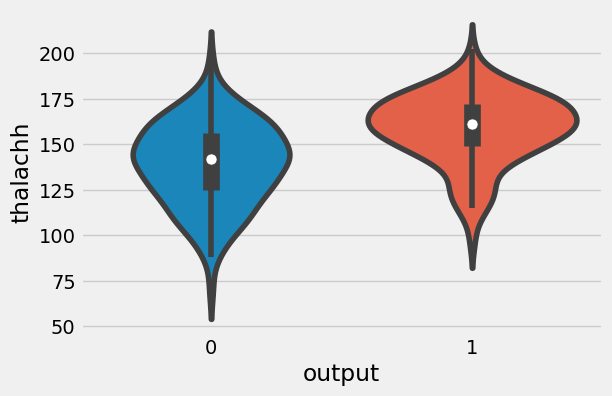

In [84]:
sns.violinplot(data=dataset, x='output', y='thalachh');

fig= plt.gcf()
fig.set_size_inches(6,4)
plt.show()

__Conclusion :__

Nous observons qu'à partir d'une moyenne de 160 battements par minute du coeur, lors d'un effort, les risques augmentent.  
On note également que le graphique est plus condensé que pour les personnes ayant moins de risques autour de cette moyenne. 
Ceci un élément essentiel, on peut conclure que plus le rythme cardiaque maximum à l'effort est proche de cette moyenne plus l'individu a de chance d'avoir une crise.

__ANALYSE DU SLP (slope) :__

N'ayant pas une information claire sur ce que signifie : slope (pente), il est impossible d'interpréter la corrélation entre celle-ci et 'output', au risque de faire une mauvaise interprétation qui pourrait induire de futurs faux diagnostics.

__ANALYSE DU THALL (Thalium stress test result ~ (0,3)) :__
*Test de stress cardiaque*

In [85]:
pd.crosstab(dataset.thall, dataset.output, margins=True).style.background_gradient(cmap='summer_r')

output,0,1,All
thall,,,
0,1,1,2
1,12,6,18
2,36,130,166
3,89,28,117
All,138,165,303


__Conclusion :__

N'ayant pas les informations pour connaître la correspondance des nombres entre 0 et 3 du test, nous ne pouvons pas rentrer dans les détails.
Toutefois, il est clairement observable que les individus ayant eu 2 au test de stress cardiaque, ont plus de risque d'avoir une crise cardiaque, là où il est préférable d'avoir eu 3 pour avoir moins de risques.
Pour les catégories 0 et 1, il est préférable de rester prudent et de les laisser de côté car nous n'avons pas assez de données pour faire une réelle différence, même si l'on remarque que pour une réponse de 1, il y a moins de chance d'avoir une crise cardiaque.

__ANALYSE DU CAA (number of major vessels (0-3)):__

In [86]:
pd.crosstab(dataset.caa, dataset.output, margins=True).style.background_gradient(cmap='summer_r')

output,0,1,All
caa,,,
0,45,130,175
1,44,21,65
2,31,7,38
3,17,3,20
4,1,4,5
All,138,165,303


__Conclusion :__

N'ayant pas les informations pour connaître la correspondance des nombres entre 0 et 3 du test, nous ne pouvons pas rentrer dans les détails.  

Néanmoins, nous pouvons observer que les individus ayant eu 0, ont plus de risque d'avoir une crise cardiaque.
Pour les autres catégories, les données montrent que les personnes avec moins de chance de contracter une crise cardiaque sont autour de 1 et 4.

Une cinquième ligne est apparût là où la documentation nous indique un maximum de 3. Il y donc une erreur qui est révélée.  
Il est donc préférable pour la suite de supprimer les données relatives à cette catégorie pour les remplacer par la valeur la plus fréquente, cad à la mode.

In [ ]:
dataset['caa'].replace([4], dataset['caa'].mode(), inplace=True)

# print(dataset[91:94])     # vérification de la ligne 92 : caa = 4 -> 0

__ANALYSE DU OLDPEAK :__

N'ayant pas une information claire sur ce que signifie : previous peak, il est impossible d'interpréter la corrélation entre celle-ci et 'output', au risque de faire une mauvaise interprétation qui pourrait induire de futurs faux diagnostics.

__ANALYSE DU EXNG : exercise induced angina (yes = 1; no = 0)__

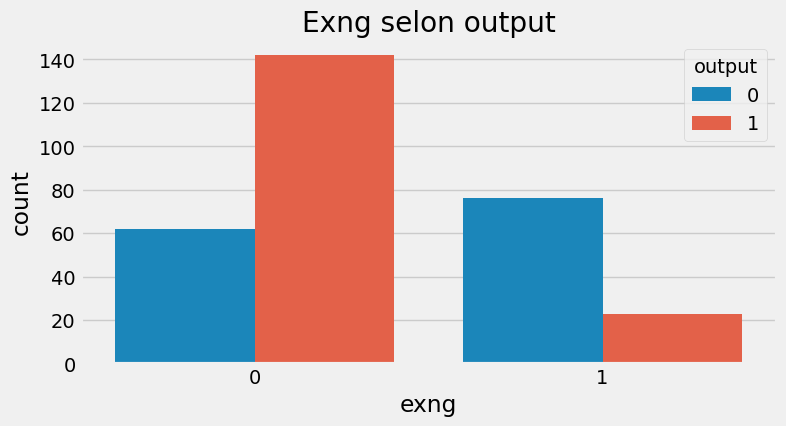

In [88]:
sns.countplot(data=dataset, x='exng', hue='output');
plt.title('Exng selon output')

fig= plt.gcf()
fig.set_size_inches(8,4)
plt.show()

__Conclusion :__

Les exercices n'induisant pas chez le patient une angine ont plus de chance d'avoir une crise cardiaque que les personnes en ayant eu une lors d'un exercice.


___________________________
</br>
Les premières corrélations avec la colonne 'output' sont intéresantes, elles ont permis d'apporter des éléments de réponse.  

Maintenant que les données avec l'output sont traités, nous pouvons revenir à notre précédente heatmap pour analyser les autres corrélations qui semble intéressante.  
Nous remarquons que *'slp'* et *'oldpeak'* ont une forte corrélation, mais manquant de précision sur ces caractéristiques, il serait vain d'en déduire quoique ce soit sans plus d'informations.  
En allant plus loin, on peut trouver deux autres corrélations à étudier en le mettant en parallèle avec l'output :
- CP vs Thalachh
- Exng vs Thalachh

__ANALYSE DU CP vs THALACHH :__

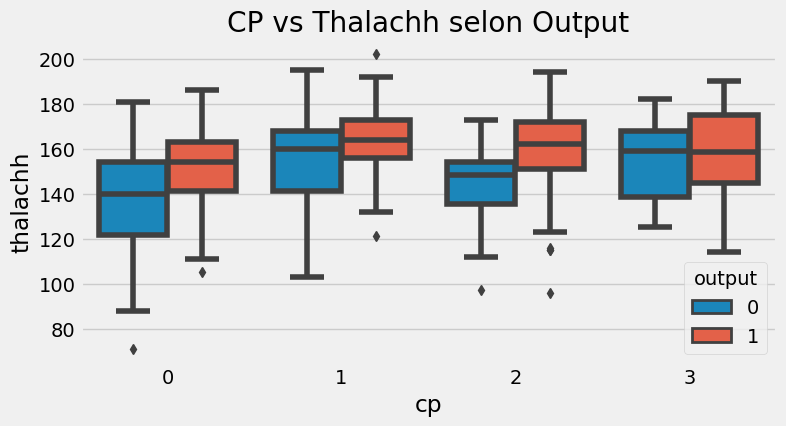

In [118]:
sns.boxplot(data=dataset, x='cp', y='thalachh',hue='output');
plt.title('CP vs Thalachh selon Output')

fig= plt.gcf()
fig.set_size_inches(8,4)
plt.show()

__Conclusion :__

Le graphique confirme les observations précédentes. En effet, les personnes ayant plus de risque appartiennent aux catégories 1 et 2 du CP et présentent un rythme cardiaque au-dessus de 160 battements par minute à la suite d'un effort.

On peut en conclure qu'à l'avenir si on observe une personne avec une btm/min > à 160 et appartenant à la cat. 1 ou 2 du CP, nous pouvons affirmer qu'il aura des grands risques de faire une crise cardiaque à l'avenir.

__ANALYSE DU EXNG vs Thalachh :__

<AxesSubplot:xlabel='exng', ylabel='thalachh'>

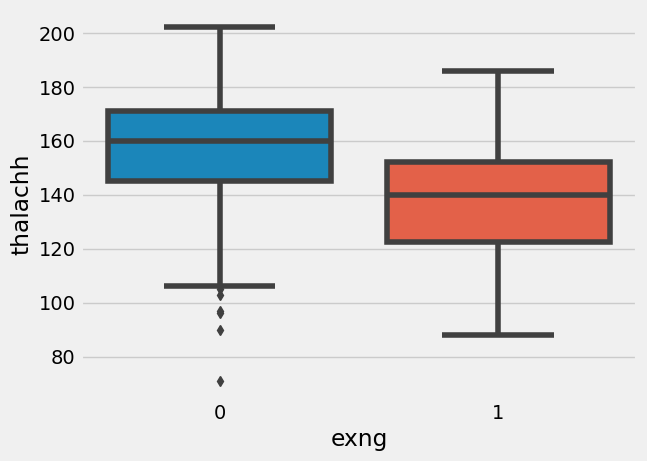

In [139]:
sns.boxplot(data=dataset, x='exng', y='thalachh')

__Conclusion :__

Ici aussi, nous avons la confirmation d'une observation précédente.
Si une personne n'a pas de douleur anginale à la suite d'un exercice alors que ses battements/min sont plus proche de 160, alors par corrélation avec les données des graphiques 'Exng vs Output' et 'Thalachh vs Output', on peut affirmer que ces personnes ont davantages de risque de crise cardiaque.

_______________________________________________
</br>
<center><h4><bold>LES GRANDES CONCLUSIONS</bold></h4></center>

On peut déjà déterminer ceci :

- Personnes ayant plus de risque d'avoir une crise cardiaque :  
    - Si leur rythme cardiaque est plus élévé après un exercice (autour de 160 battements/m) *(graphique Analyse du Thalachh)*
    - Si elles n'ont pas de crise d'anginal à la suite d'un exercice *(graphique Analyse Exgn)*
    - Si elles ne ressentent pas de douleur thoracique à la suite d'une crise anginale (cat. 2) *(graphique Analyse CP)*  
    - Si elles ont eu 2 au test de stress *(graphique Analyse Thall)*
    - Si elles ont eu 0 au CAA *(graphique Analyse CAA)*  
</br>  
  
- Personnes ayant moins de risque d'avoir une crise cardiaque :  
    - Si leur rythme cardiaque est moins élévés après un exercice (autour de 145 battements/m) *(graphique Analyse du Thalachh)*
    - Si elles ont une crise d'anginal à la suite d'un exercice *(graphique Analyse Exgn)*
    - Si elles ressentent une douleur thoracique à la suite d'une crise anginale (cat. 0) *(graphique Analyse CP)*
    - Si elles ont eu 3 au test de stress *(graphique Analyse Thall)*
    - Si elles ont eu 1, 2 ou 3 au CAA *(graphique Analyse CAA)*
</br>  

_________________________________________
______________________________________

<center><h2>Fractionnement de la data : Training Set (Train + Validation) et Test Set</h2></center>

In [214]:
# Import de la fonction, nous permettant de split notre dataset en 2 (Train + Test set)
from sklearn.model_selection import train_test_split

Avant de construire nos deux set, nous pouvons recréer un dataset avec uniquement les colonnes que nous allons garder par la suite pour notre modèle.  
En effet, nous avons vu que toutes les colonnes n'étaient pas nécessaires pour notre analyse. Ainsi, nous pouvons garder les colonnes : 'age', 'sex', 'caa', 'cp', 'exng', 'thall', 'thalachh' et 'output'.

In [ ]:
# Construction de notre nouveau dataset comprenant que les colonnes
# 'age', 'sex', 'caa', 'cp', 'exng', 'thall', 'thalachh' et 'output'

df_ml = dataset.drop(['trtbps', 'chol', 'fbs', 'restecg', 'oldpeak', 'slp'], axis=1)
#df_ML.head()   # verification  de notre nouveau dataset

# Diviser le df_ML en deux les features d'un côté et l'output de l'autre
features_list = ['age', 'sex', 'caa', 'cp', 'exng', 'thall', 'thalachh']
output_list = ['output']

df_ml_features = df_ml[features_list]
df_ml_output = df_ml[output_list]

# Verification des deux datasets Features / Output
#df_ml_features.head()
#df_ml_output.head()

Par convention, nous adopterons un 'TrainSet' comprenant 80% de notre dataset df_ml,  et les 20% restant serviront à notre 'TestSet'

In [237]:
# Création des tableau x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test = train_test_split(df_ml_features, df_ml_output, test_size=0.2)

print('Train set :', x_train.shape)
print('Test set :', x_test.shape)

Train set : (242, 7)
Test set : (61, 7)


Le fractionnement ainsi fait, nous pouvons passer à la mise à l'échelle des caractéristiques.

________________________________________________
________________________________________________

<center><h2>Mise à l'échelle des caractéristiques/features</h2></center>

La mise à l'échelle se fera seulement sur le jeu de données dédié à l'entraînement de notre modèle, cad notre x_train.

In [265]:
# Import des fonctions qui peuvent nous servir à la mise à l'échelle
# Ici, nous utiliserons une technique de RobustScaler pour avoir 
# des données normalement distribuées en prenant en compte nos outliers
# avant d'appliquer un MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
#from sklearn.preprocessing import StandardScaler

mms = MinMaxScaler()
rs = RobustScaler()
#sc = StandardScaler()

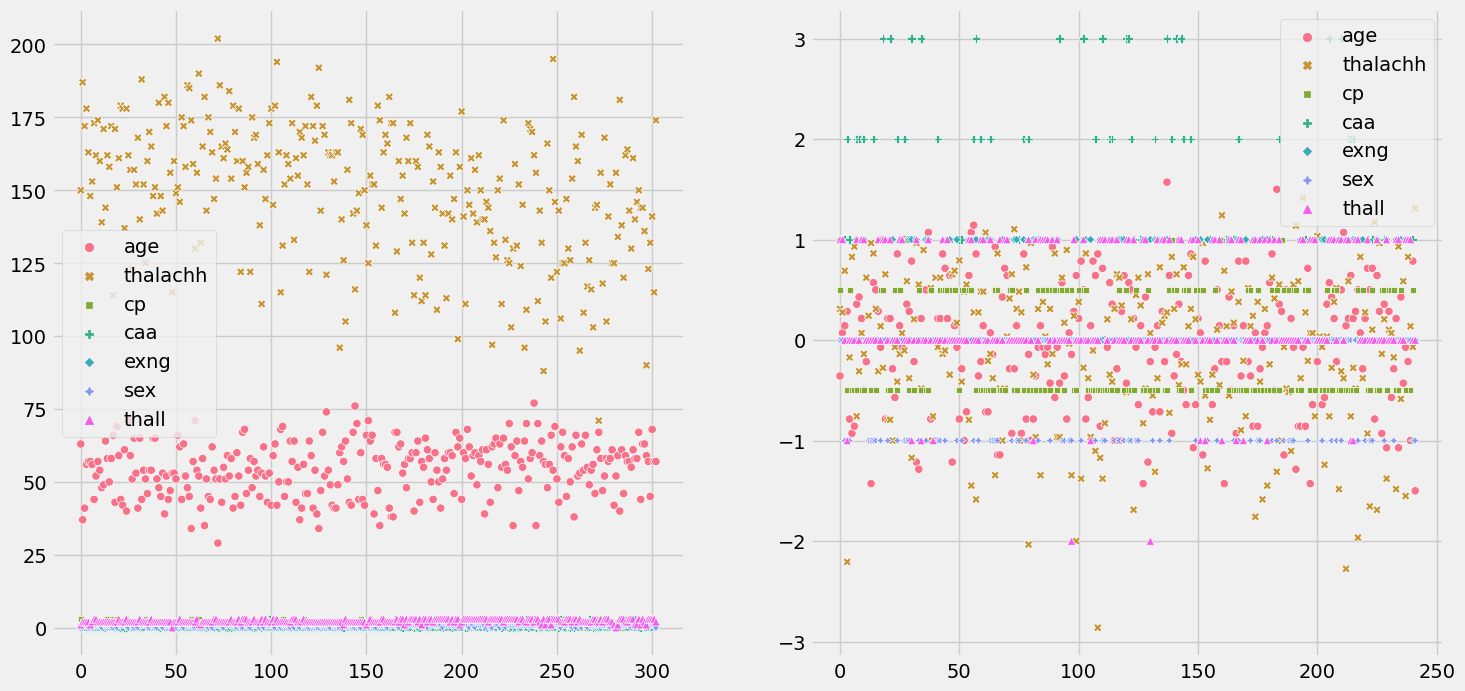

In [269]:
# Mise à l'échelle de notre x_train -> x_train_scl, via un RobustScaler
keep_cols = ['age', 'thalachh', 'cp', 'caa', 'exng', 'sex', 'thall']
x_train_scl = rs.fit_transform(x_train[keep_cols])
x_train_scl = pd.DataFrame(x_train_scl, columns=keep_cols)

# Visualisation Avant/Après mise à l'échelle
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.scatterplot(data = dataset[keep_cols])
plt.subplot(1,2,2)
sns.scatterplot(data = x_train_scl)

plt.show()

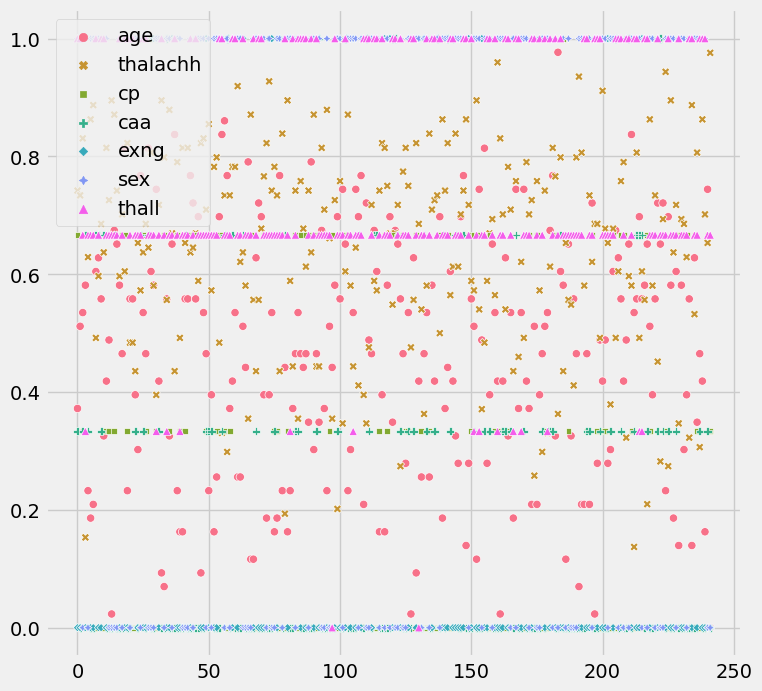

In [268]:
# Application d'un minMaxScaler sur x_train_scl
keep_cols = ['age', 'thalachh', 'cp', 'caa', 'exng', 'sex', 'thall']
x_train_scl = mms.fit_transform(x_train[keep_cols])
x_train_scl = pd.DataFrame(x_train_scl, columns=keep_cols)

# Visualisation Avant/Après mise à l'échelle
sns.scatterplot(data = x_train_scl)

fig= plt.gcf()
fig.set_size_inches(8,8)
plt.show()

In [ ]:
#df_ml.head()           # Avant Feature Scaling
#x_train_scl.head()     # Après FS

______________________________________________
______________________________________________

<center><h2>The End</h2></center>

<center><i>Maintenant que notre dataset est préparé, fractionné en deux set et que notre TrainSet est mis à l'échelle, via la technique du RobustScale, nous pourrons procéder au choix d'un modèle de Machine Learning.</i></center>
</br>  
<center><i>brief EDA_HA_mod, pour la version avec un dataset modifié avec données manquantes</i></center>